In [2]:
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
import h5py
import glob
sys.path.insert(1, '/home/lars/predatorprey-1/predprey-staticnw/')
from animateSwarm import AnimateTools as at
from TsTools import general as gen
from pathlib import Path
import pickle
from functools import partial
from vmodel import geometry as vgeom
from vmodel import plot
from vmodel.util import color as vcolor
import math
from scipy.signal import find_peaks

In [29]:
def getCOM(positions):
    return np.mean(positions, axis = 0)

noise_change_visPred=220.0_nprey_100_npred_5_frange_10_fstr_5_visPred_220.0_visPrey_330_astr_3_dphi_0.2_repPrey_1_repRadPrey_1_repPred_1_repRadPred_15.0_attPrey_1_attRadPrey_3_repCol_1000_hstr_1_steps_11000
[1042 1573 1905 3684 6973 7128 7411 8125 8247]
[ 2239  4389  5370  8699 10255 10463]
[ 689 3188 5978 6808 6908 9896]
[ 328  787 2170 9426 9755]
[5111 7868]


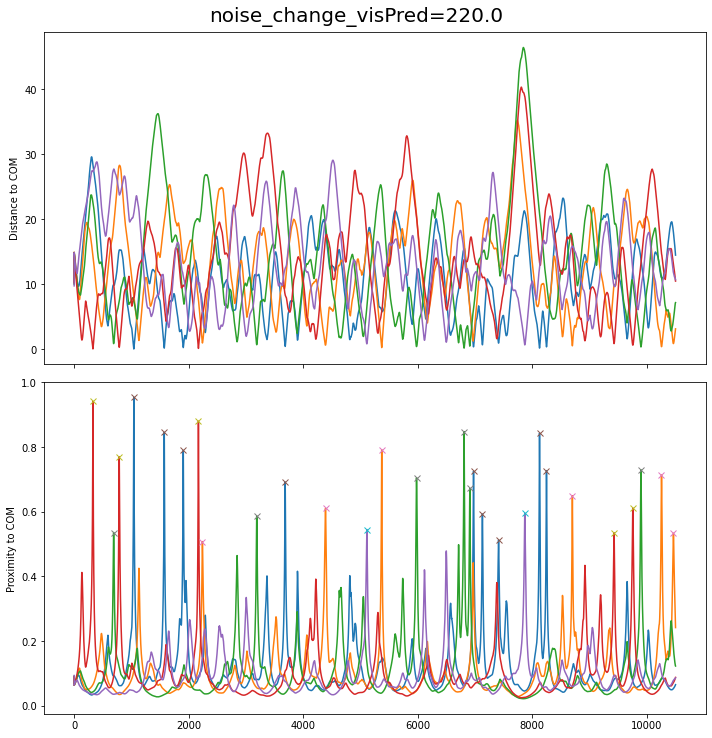

In [75]:
out_str = "/home/lars/vmodel_output/"
args_def = {
'nprey': 100,
'npred': 5,
'frange': 10,
'fstr': 5,
'visPred': 120,
'visPrey': 330,
'astr': 3,
'dphi': 0.2,
'repPrey': 1,
'repRadPrey': 1,
'repPred': 1,
'repRadPred': 20,
'attPrey': 1,
'attRadPrey': 3,
'repCol': 1000,
'hstr': 1,
'steps': 12000,
    }

args_def = {
'nprey': 100,
'npred': 5,
'frange': 10,
'fstr': 5,
'visPred': 220.0,
'visPrey': 330,
'astr': 3,
'dphi': 0.2,
'repPrey': 1,
'repRadPrey': 1,
'repPred': 1,
'repRadPred': 15.0,
'attPrey': 1,
'attRadPrey': 3,
'repCol': 1000,
'hstr': 1,
'steps': 11000,
    }

reps = 1

var_par = ["dphi", "dphi", "repRadPred", "repRadPred", "repRadPred", 'repPred', 'repPred', 'repPred','visPred', 'visPred', 'visPred' ]
var_val = [0.01, 1.0, 5.0, 10.0, 25.0, 0.5, 2.0, 5.0, 90.0, 180.0, 300.0]


var_par = ["visPred"]
var_val = [220.0]


changes = len(var_par)
#changes = 1

list_args = []
for i in range(changes):
    list_args.append(args_def.copy())

if len(var_par) != len(var_val):
    sys.exit( "Lists do not match!")


for ii in range(changes):
    
    args = list_args[ii]
    args[var_par[ii]] = var_val[ii]
    

    data_full = []
    data_norm_full = []
    peaks_full =[]
    
    
    for rep in range(reps):



        args_str = '_'.join(f'{k}_{v}' for k, v in args.items())
        file_h5 = f'{out_str}_{args_str}.states.nc'
        name = "noise_change_"+str(var_par[ii])+"="+str(var_val[ii])+"_"+args_str
        title = "noise_change_"+str(var_par[ii])+"="+str(var_val[ii])
        print(name)

        #print(file_h5)

        #file_h5 = "/home/lars/vmodel/output/state.nc"
        npred = args["npred"]
        nprey = args["nprey"]
        steps = args["steps"]


        with h5py.File(file_h5) as fh5:

            #pos1 = np.array(fh5['/position'])
            pos = np.moveaxis(np.array(fh5['/position']), [3,2], [1,3])[rep,:,:,:]


        #print(np.shape(pos1))
        pos_pred = pos[:,100:,:]
        pos_prey = pos[:,:100,:]

        data = np.zeros((steps-499, npred))
        data_norm = np.zeros((steps-499, npred))
        for i in range(len(pos[:,0,0])):

            com = getCOM(pos_prey[i, :, :])

            for j in range(len(pos_pred[0,:,0])):
                pos_self = pos_pred[i,j,:]
                pos_dif = com - pos_self
                dist = 1/(np.linalg.norm(pos_dif)+1)
                dist = np.linalg.norm(pos_dif)
                data[i,j] = abs(dist)

                data_norm[i,j] = (1/(abs(dist)+1))
        data_full.append(data)
        data_norm_full.append(data_norm)


    cutoff = 0
    
    

        
        
    fig, axs = plt.subplots(2, 1, sharex=True)
    plt.gcf().set_size_inches(10,10)
    


    
    
    axs[0].plot(data_full[0][cutoff:])
    #axs[2].plot(data_full[1][cutoff:])
    #axs[4].plot(data_full[2][cutoff:])
    axs[1].plot(data_norm_full[0][cutoff:])
    
    
    for jj in range(npred):
        peaks_full.append(find_peaks(data_norm_full[0][:,jj], height=0.5))
        print(peaks_full[jj][0])
        axs[1].plot(peaks_full[jj][0], data_norm_full[0][:,jj][peaks_full[jj][0]], "x")
    #axs[3].plot(data_norm_full[1][cutoff:])
    #axs[5].plot(data_norm_full[2][cutoff:])
    
    axs[0].set(ylabel="Distance to COM")
    #axs[2].set(ylabel="Distance to COM")
    #axs[4].set(ylabel="Distance to COM")
    
    axs[1].set(ylabel="Proximity to COM")
    #axs[3].set(ylabel="Proximity to COM")
    #axs[5].set(ylabel="Proximity to COM")
    
    #axs[5].set(xlabel="Timestep")
    
    fig.text(0.5, 1, title, ha='center', fontsize=20)

    fig.tight_layout()

    plt.savefig("/home/lars/vmodel_output/prox_"+str(name)+".pdf",bbox_inches="tight")

In [77]:
peaks_full[0][0]

array([1042, 1573, 1905, 3684, 6973, 7128, 7411, 8125, 8247])

In [47]:
data_norm_full[0][data_norm_full[0] > 0.6]

array([0.6190737 , 0.650615  , 0.68470254, 0.72515604, 0.77160492,
       0.82569907, 0.88714042, 0.94175301, 0.92131881, 0.85673173,
       0.79484348, 0.74046827, 0.69208011, 0.64915895, 0.61086028,
       0.60753573, 0.63938451, 0.67455509, 0.70609344, 0.737305  ,
       0.7581896 , 0.76974761, 0.76360014, 0.74430869, 0.71929808,
       0.69227447, 0.66212965, 0.6313141 , 0.60155846, 0.61756573,
       0.65312443, 0.69331033, 0.73670564, 0.78800828, 0.84541509,
       0.91115997, 0.95425973, 0.90053234, 0.83423083, 0.77570018,
       0.72577643, 0.68176502, 0.6423794 , 0.60714252, 0.61119431,
       0.65325776, 0.70194234, 0.75707936, 0.80983331, 0.84560531,
       0.83769536, 0.78772412, 0.72996146, 0.67707234, 0.62939137,
       0.61674531, 0.65342004, 0.69504463, 0.73803829, 0.77412231,
       0.78951674, 0.78260542, 0.75505903, 0.71677956, 0.67559445,
       0.6347383 , 0.62378236, 0.66667142, 0.71497115, 0.76873842,
       0.82597799, 0.8726908 , 0.88009137, 0.83525193, 0.77846

In [22]:
def att(dist_interactions):
    
    fstrength = []
    for dist_interaction in dist_interactions:
        l0 = 1
        l1 = 1
        k_att = 3
        k_rep = 3

        if (abs(dist_interaction) <= l0):
            fstrength.append(k_rep * (dist_interaction - l0))
        elif (abs(dist_interaction) > l1):
            fstrength.append(k_att * (dist_interaction - l1))
        
    return fstrength

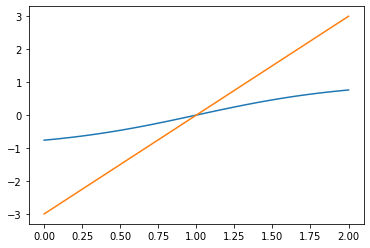

In [26]:

rep_steepness=-1
rep_range = 1
dist_interaction = np.linspace(0,2*rep_range,100)


    
fstrength = (2 * (0.5*(np.tanh(rep_steepness*(dist_interaction-rep_range))+1.0))) - 1
fstrength2 = att(dist_interaction)

plt.plot(dist_interaction, -fstrength)
plt.plot(dist_interaction, fstrength2)

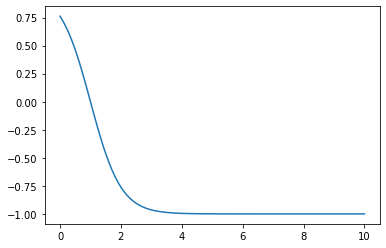